In [1]:
## for data
import numpy as np
import pandas as pd
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for geospatial
import folium
import geopy
## for machine learning
from sklearn import preprocessing, cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy
from scipy.spatial.distance import cdist
import math
## for deep learning
import minisom

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("mumbai_df_geocoded")
df

raw_address  \
0      2 104 105 navjivan society lamington rd    mum...   
1      210 211 radhe vallabh chs 2nd flr french bridg...   
2                   60 a breach candy bhulabhai desai rd   
3      601 cornelian 104 august kranti marg  kemps co...   
4                       7 jer mansion august kranti marg   
...                                                  ...   
16015  301 prashant  vrishicomplex holy cross road ic...   
16016  a 602 rohan residency ram mandir road babhai b...   
16017  303 c avanti apartment l m road navagaon dahis...   
16018  303 c avanti apartment l m road navagaon dahis...   
16019  flat no 202 second floor building no 13 rashmi...   

                                      formatted_addresss        lat        lng  
0      2, Navjeevan Society, Dalal Estate, Kamathipur...  18.967421  72.821425  
1      French Brg, Charni Road East, Opera House, Gir...  18.957048  72.814591  
2      Bhulabhai Desai Marg, Breach Candy, Cumballa H...  18.972314  72.805186  
3      Coninel Building, August Kranti Rd, Gowalia Ta...  18.964256  72.808338  
4           August Kranti Rd, Mumbai, Maharashtra, India  18.963802  72.808755  
...                                                  ...        ...        ...  
16015  Holy Cross Rd, I C Colony, Borivali West, Mumb...  19.250542  72.850686  
16016  Ram Mandir Rd, Babhai Naka, Borivali West, Mum...  19.228020  72.844404  
16017  Avanti Apartments, Shri Ajramarji Marg, Navaga...  19.251502  72.854363  
16018       Laxman Mhatre Rd, Mumbai, Maharashtra, India  19.251004  72.853729  
16019  Opp. Don Bosco High School St. Marys Road, Nai...  19.358684  72.853431  

[16020 rows x 4 columns]

In [3]:
# city1 = 'Mumbai'
# city2 = 'Vasai-Virar'
# city3 = 'Mira Bhayandar'
# city4 = 'Navi Mumbai'
# mumbai_df = df[df["formatted_addresss"].str.contains(city1) | df["formatted_addresss"].str.contains(city2) | df["formatted_addresss"].str.contains(city3)]
# mumbai_df = mumbai_df[~mumbai_df["formatted_addresss"].str.contains(city4)]

In [4]:
#df = mumbai_df.copy().reset_index().drop(columns='index',axis=0)

In [5]:
# Checking the pincode with highest addresses
import re

zip_codes = []
for address in df['formatted_addresss']:
    zip_code = re.findall('\d{6}',address)
    for i in zip_code:
        zip_codes.append(i)

count = {}
for i in zip_codes:
    count[i] = count.get(i,0) + 1

# for i in count.items():
#     if i[1]>1000:
#         print("Pincode:",i[0],",",i[1])

print(count.keys())


dict_keys(['400008', '400026', '400010', '400027', '400005', '400001', '400021', '400020', '400080', '400082', '400067', '400101', '400064', '400024', '400077', '400072', '400070', '400078', '400003', '400002', '400004', '400012', '400033', '400015', '400014', '400017', '400028', '400016', '400097', '400063', '400095', '400068', '400103', '400066', '400051', '400055', '400057', '400029', '400047', '400089', '400050', '400098', '400025', '400018', '400013', '400052', '400054', '400037', '400022', '400031', '400062', '400104', '400092', '400091', '400083', '400042', '400076', '400043', '400086', '400093', '400059', '400058', '400056', '400049', '400071', '400102', '400053', '400019', '400036', '400006', '400034', '400069', '400030', '400061', '400007', '400075', '400065', '400081', '400096', '400074', '400099', '400038', '400088', '400094', '400079', '400009', '400060', '400011', '400039', '400604', '401107', '401202', '401201', '401105', '401106', '401101', '401209', '401208', '400084',

In [6]:
df = df[df["formatted_addresss"].str.contains("400092")]

In [7]:
df

raw_address  \
261          laxmi palace 1st floor s v road    malad  w   
286    1 st floor utkarsh height dr  karode road nata...   
287    401 vini elegance 4th floor above tanisq jewel...   
288    101 102 anjana apt s v p road shimpoli   junct...   
290    101 102 anjana apt s v p road shimpoli   junct...   
...                                                  ...   
15969  plot no56 rsc 09 gorai 1 borivali w mumbai 400091   
15992  b 403 simran co hsg soc divine home colony man...   
15997  f 120 sunderdham rambaug lane borivali west mu...   
16008  plot no 292 312 rsc 25 gorai borivali west mum...   
16016  a 602 rohan residency ram mandir road babhai b...   

                                      formatted_addresss        lat        lng  
261    Laxmi Palace, Swami Vivekananda Rd, Mhatre Wad...  19.225482  72.854479  
286    Utkarsh Heights, Ground Floor, S.V Road, 6VF3+...  19.223261  72.854474  
287    6VH3+929, Lokmanya Tilak Rd, Lokmanya Tilak Na...  19.228425  72.852599  
288    Shimpoli Rd & Shimpoli Rd, Rayani Gram, Boriva...  19.223597  72.850241  
290    Anjana Apartments, Shimpoli Rd, Meghdoot, Vive...  19.223130  72.853371  
...                                                  ...        ...        ...  
15969  B-9, Gorai 1, Borivali West, Mumbai, Maharasht...  19.228691  72.830054  
15992  HSG. Society, Yogi Nagar, Borivali West, Mumba...  19.227088  72.826068  
15997  Sunder Dham, Poisar, Borivali West, Mumbai, Ma...  19.215240  72.853302  
16008  25, Gorai Rd, Mhada Colony, Borivali West, Mum...  19.230301  72.839366  
16016  Ram Mandir Rd, Babhai Naka, Borivali West, Mum...  19.228020  72.844404  

[1121 rows x 4 columns]

In [8]:
city = "Borivali West, Mumbai"
## get location
locator = geopy.geocoders.Nominatim(user_agent="college_project_clustering")
location = locator.geocode(city)
print(location)
## keep latitude and longitude only
location = [location.latitude, location.longitude]
print("[lat, long]:", location)

Borivali West, R/C Ward, Zone 4, Mumbai, Mumbai Suburban, Maharashtra, 400103, India
[lat, long]: [19.2294561, 72.8479905]


In [9]:
location = [19.2294561, 72.8479905]
location

[19.2294561, 72.8479905]

In [10]:
X=df.loc[:,['lat','lng']]
points= np.array(X)
print(points)

[[19.2254817 72.8544788]
 [19.2232612 72.854474 ]
 [19.2284246 72.8525995]
 ...
 [19.21524   72.8533018]
 [19.2303011 72.8393662]
 [19.2280199 72.8444044]]


# K-means++

In [11]:
def distance(origin, destination): #found here https://gist.github.com/rochacbruno/2883505
    lat1, lon1 = origin[0],origin[1]
    lat2, lon2 = destination[0],destination[1]
    radius = 6371 # km
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c * 1000

    return d

In [12]:
dis = distance((19.236025,72.84645259999999),(19.2347968,72.83825139999999))
dis

871.7849713092911

In [13]:
from haversine import haversine, Unit

l1 = (19.236025,72.84645259999999) # (lat, lon)
l2 = (19.2347968,72.83825139999999)

haversine(l1,l2,unit='m')

871.7861754690628

In [14]:
def create_clusters(number_of_clusters,points):    
    kmeans = KMeans(n_clusters=number_of_clusters, random_state=0, init='k-means++',max_iter=500,n_init=10).fit(points)    
    id_label=kmeans.labels_    
    l_array = np.array([[label] for label in kmeans.labels_])
    clusters = np.append(points,l_array,axis=1)
    return clusters

In [15]:
def cluster_centroids(number_of_clusters,points):
    kmeans = KMeans(n_clusters=number_of_clusters, random_state=0, init='k-means++',max_iter=500,n_init=10).fit(points)
    
    id_label=kmeans.labels_    
    l_array = np.array([[label] for label in kmeans.labels_])
    clusters = np.append(points,l_array,axis=1)
    closest= scipy.cluster.vq.vq(kmeans.cluster_centers_, points)[0]
    centroids = np.array([])
    for i in closest:
        i = int(i)
        centroids = np.concatenate((centroids,points[i]),axis=0) # returns concatenation of size (number_of_clusters,0)
    centroids = centroids.reshape(number_of_clusters,2)
    return clusters,centroids

In [16]:
points[998] #clsosest point to centroid for 0th cluster

array([19.2194771, 72.8390621])

In [17]:
clusters, centroids = cluster_centroids(21,points)
print(clusters)
print(centroids)

[[19.2254817 72.8544788  4.       ]
 [19.2232612 72.854474  20.       ]
 [19.2284246 72.8525995  4.       ]
 ...
 [19.21524   72.8533018  6.       ]
 [19.2303011 72.8393662  5.       ]
 [19.2280199 72.8444044 12.       ]]
[[19.2194771 72.8390621]
 [19.223645  72.846879 ]
 [19.2291242 72.8240669]
 [19.2409949 72.8447052]
 [19.2268135 72.854548 ]
 [19.2289619 72.8403931]
 [19.217472  72.8519864]
 [19.2386459 72.7826775]
 [19.1900837 72.8406087]
 [19.2171872 72.8478688]
 [19.231962  72.8477722]
 [19.2325342 72.8284175]
 [19.2277494 72.8444141]
 [19.2351624 72.8554601]
 [19.2280321 72.850946 ]
 [19.235261  72.842794 ]
 [19.226121  72.8333185]
 [19.2277944 72.8281573]
 [19.2217391 72.8424149]
 [19.2394256 72.802201 ]
 [19.222977  72.8524627]]


### Validate Clusters based on distance

In [18]:
def validate_cluster(max_dist,cluster):
    distances = cdist(cluster,cluster, lambda ori,des: float((distance(ori,des))))
    #print(distances)
    #print(30*'-')
    for item in distances.flatten():
        if item > max_dist:
            return False
    return True

In [19]:
def validate_solution(max_dist,clusters):
    _, __, n_clust = clusters.max(axis=0)
    n_clust = int(n_clust)
    for i in range(n_clust):
        two_d_cluster=clusters[clusters[:,2] == i][:,np.array([True, True, False])]
        if not validate_cluster(max_dist,two_d_cluster):
            return False
        else:
            continue
    return True

In [20]:
for i in range(2,30): 
    if(validate_solution(1500,create_clusters(i,points))): #1500meters
        print("Solution validated for K:",i)
        break

Solution validated for K: 21


### Validate using TSP

In [21]:
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

In [22]:
def create_data_model(matrix,depot):
    """Stores the data for the problem."""
    data = {}
    data['distance_matrix'] = matrix
    data['num_vehicles'] = 1
    data['depot'] = depot
    return data

In [23]:
def print_obective(manager, routing, solution):
    """Prints solution on console."""
    print('Objective: {} metres'.format(solution.ObjectiveValue()))

In [24]:
def optimal_k_using_tsp(points,threshold):
	value = 0
	for k in range(2,40):
		clusters, centroids = cluster_centroids(k,points)
		_, __, n_clust = clusters.max(axis=0)
		n_clust = int(n_clust)
		for cls_no in range(n_clust+1):
			cluster_i = clusters[clusters[:,2] == cls_no][:,np.array([True, True, False])] # 2d matrix for ith cluster
			distance_matrix_i = cdist(cluster_i,cluster_i, lambda ori,des: float((distance(ori,des))))
			for index in range(len(cluster_i)):
				if (cluster_i[index] == centroids[cls_no]).any():
					data = create_data_model(distance_matrix_i,index)
					manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                                        data['num_vehicles'], data['depot'])
					routing = pywrapcp.RoutingModel(manager)
					def distance_callback(from_index,to_index):
						from_node = manager.IndexToNode(from_index)
						to_node = manager.IndexToNode(to_index)
						return data['distance_matrix'][from_node][to_node]
					transit_callback_index = routing.RegisterTransitCallback(distance_callback)
					routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)
					search_parameters = pywrapcp.DefaultRoutingSearchParameters()
					search_parameters.first_solution_strategy = (routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)
					solution = routing.SolveWithParameters(search_parameters)
					break
			if solution.ObjectiveValue()>threshold:
				value=0
				break
			else:
				value=1
				continue
		if value==0:
			continue
		if value==1:
			value = k
			break
	return value

In [25]:
k = optimal_k_using_tsp(points,3500)
print("Solution validated with the Constraint of 3500m at k: 25")

Solution validated with the Constraint of 3500m at k: 25


In [26]:
value=0
for k in range(2,40):
    clusters, centroids = cluster_centroids(k,points)
    _, __, n_clust = clusters.max(axis=0)
    n_clust = int(n_clust)
    for cls_no in range(n_clust+1):
        cluster_i = clusters[clusters[:,2] == cls_no][:,np.array([True, True, False])] # 2d matrix for ith cluster
        distance_matrix_i = cdist(cluster_i,cluster_i, lambda ori,des: float((distance(ori,des))))
        for index in range(len(cluster_i)):
            if (cluster_i[index] == centroids[cls_no]).any():
                data = create_data_model(distance_matrix_i,index)


                # Create the routing index manager.
                manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                                        data['num_vehicles'], data['depot'])

                # Create Routing Model.
                routing = pywrapcp.RoutingModel(manager)


                def distance_callback(from_index, to_index):
                    """Returns the distance between the two nodes."""
                    # Convert from routing variable Index to distance matrix NodeIndex.
                    from_node = manager.IndexToNode(from_index)
                    to_node = manager.IndexToNode(to_index)
                    return data['distance_matrix'][from_node][to_node]

                transit_callback_index = routing.RegisterTransitCallback(distance_callback)

                # Define cost of each arc.
                routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

                # Setting first solution heuristic.
                search_parameters = pywrapcp.DefaultRoutingSearchParameters()
                search_parameters.first_solution_strategy = (
                    routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

                # Solve the problem.
                solution = routing.SolveWithParameters(search_parameters)

                # Print solution on console.
                #if solution:
                    #print_solution(manager, routing, solution)
                
                #print("Centroid for "+str(cls_no)+" th cluster at "+str(index))
                break
        if solution.ObjectiveValue()>3500:
            value=0
            break

        ## need to work from here
        else:
            value=1
            continue
    if value==0:
       continue
    if value==1:
        value = k
        print("Optimal K found using TSP:",value)
        break

    
# for threshold: 4000, k: 25
# for threshold: 3000, k: 33


Optimal K found using TSP: 25


In [27]:
def print_solution(manager, routing, solution):
    """Prints solution on console."""
    print('Objective: {} metres'.format(solution.ObjectiveValue()))
    index = routing.Start(0)
    plan_output = 'Route for vehicle 0:\n'
    route_distance = 0
    while not routing.IsEnd(index):
        plan_output += ' {} ->'.format(manager.IndexToNode(index))
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += ' {}\n'.format(manager.IndexToNode(index))
    print(plan_output)
    plan_output += 'Route distance: {}metres\n'.format(route_distance)

In [28]:
# for k=25, routing distance for each cluster, manual check for optimal k
clusters, centroids = cluster_centroids(25,points)
_, __, n_clust = clusters.max(axis=0)
n_clust = int(n_clust)
for cls_no in range(n_clust+1):
    cluster_i = clusters[clusters[:,2] == cls_no][:,np.array([True, True, False])] # 2d matrix for ith cluster
    distance_matrix_i = cdist(cluster_i,cluster_i, lambda ori,des: float((distance(ori,des))))
    for index in range(len(cluster_i)):
        if (cluster_i[index] == centroids[cls_no]).any():
            data = create_data_model(distance_matrix_i,index)


            # Create the routing index manager.
            manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                                    data['num_vehicles'], data['depot'])

            # Create Routing Model.
            routing = pywrapcp.RoutingModel(manager)


            def distance_callback(from_index, to_index):
                """Returns the distance between the two nodes."""
                # Convert from routing variable Index to distance matrix NodeIndex.
                from_node = manager.IndexToNode(from_index)
                to_node = manager.IndexToNode(to_index)
                return data['distance_matrix'][from_node][to_node]

            transit_callback_index = routing.RegisterTransitCallback(distance_callback)

            # Define cost of each arc.
            routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

            # Setting first solution heuristic.
            search_parameters = pywrapcp.DefaultRoutingSearchParameters()
            search_parameters.first_solution_strategy = (
                routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

            # Solve the problem.
            solution = routing.SolveWithParameters(search_parameters)

            # Print solution on console.
            print("For "+str(cls_no)+"th Cluster:")
            if solution:
                print_solution(manager, routing, solution)
            
            #print("Centroid for "+str(cls_no)+" th cluster at "+str(index))
            break



For 0th Cluster:
Objective: 1538 metres
Route for vehicle 0:
 0 -> 7 -> 3 -> 2 -> 1 -> 29 -> 17 -> 30 -> 33 -> 10 -> 21 -> 13 -> 14 -> 16 -> 28 -> 18 -> 4 -> 25 -> 24 -> 12 -> 11 -> 34 -> 19 -> 5 -> 27 -> 26 -> 23 -> 22 -> 15 -> 9 -> 8 -> 20 -> 6 -> 31 -> 32 -> 0

For 1th Cluster:
Objective: 2308 metres
Route for vehicle 0:
 30 -> 104 -> 103 -> 88 -> 78 -> 63 -> 45 -> 17 -> 93 -> 48 -> 69 -> 31 -> 100 -> 90 -> 66 -> 52 -> 39 -> 24 -> 23 -> 2 -> 98 -> 15 -> 8 -> 1 -> 0 -> 51 -> 32 -> 53 -> 5 -> 86 -> 76 -> 65 -> 25 -> 18 -> 109 -> 110 -> 102 -> 12 -> 14 -> 61 -> 9 -> 16 -> 19 -> 21 -> 27 -> 35 -> 41 -> 42 -> 43 -> 46 -> 55 -> 62 -> 67 -> 68 -> 74 -> 84 -> 92 -> 97 -> 50 -> 94 -> 101 -> 28 -> 29 -> 60 -> 13 -> 11 -> 107 -> 70 -> 80 -> 59 -> 20 -> 108 -> 82 -> 72 -> 36 -> 10 -> 57 -> 105 -> 6 -> 56 -> 26 -> 75 -> 85 -> 37 -> 38 -> 71 -> 81 -> 7 -> 58 -> 49 -> 95 -> 40 -> 79 -> 89 -> 44 -> 91 -> 47 -> 96 -> 3 -> 4 -> 54 -> 22 -> 33 -> 64 -> 77 -> 87 -> 99 -> 112 -> 34 -> 73 -> 83 -> 106 ->

### Elbow Method (Uses Euclidean Distance)

In [29]:
X = df[["lat","lng"]]
max_k = 100
## iterations
wcss = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=0)
       model.fit(X)
       wcss.append(model.inertia_)

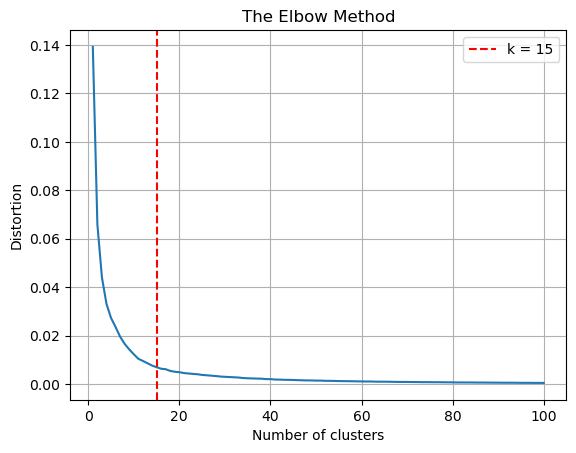

In [30]:
## best k: the lowest derivative
k = [i*100 for i in np.diff(wcss,2)].index(min([i*100 for i in np.diff(wcss,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(wcss)+1), wcss)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

In [31]:
# For 40092 :
# Kmeans++ with Elbow Methods: k = 15
# Kmeans++ with TSP route optimization: k =25 (Threshold: 3500)
k = 15
model = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=500, n_init=10, random_state=0)
X = df[["lat","lng"]]
## clustering
km_X = X.copy()
km_X["cluster"] = model.fit_predict(X)
## find real centroids
closest, distances = scipy.cluster.vq.vq(model.cluster_centers_, 
                     km_X.drop("cluster", axis=1).values)
km_X["centroids"] = 0
for i in closest:
    km_X["centroids"].iloc[i] = 1
## add clustering info to the km_df dataset
km_df = df.copy()
km_df[["cluster","centroids"]] = km_X[["cluster","centroids"]]
km_df.sample(5)

raw_address  \
7888   503 hiranyakeshi plot no 107  gorai 2 borivali...   
8289   d 101 shree rajesh nagar chs ltd saibaba nagar...   
12133  c 101 green view no 1 chs prerana nagar   vazi...   
3215   505  nikita apartment no 1 shimpolichikuwadi r...   
14446  a 1303  rameshwar tower  next to gokhale schoo...   

                                      formatted_addresss        lat  \
7888   Plot No 107 Hiranyakeshi, Siddhi Society, Sama...  19.226884   
8289   6R8W+7V8, near J B Khot School, Saibaba Nagar,...  19.215668   
12133  Green View Apartment, Prerna Nagar, Babhai Nak...  19.227488   
3215   Nikita Apartments, New Nikita, Shimpoli, Boriv...  19.223275   
14446  Dalvi Nagar, Borivali, Mumbai, Maharashtra 400...  19.223454   

             lng  cluster  centroids  
7888   72.826134        0          0  
8289   72.847207        3          0  
12133  72.845251        2          0  
3215   72.842247        4          0  
14446  72.850902        5          0

In [32]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
model = cluster.KMeans(n_clusters=15, init='k-means++', max_iter=500, n_init=10, random_state=0)
label = model.fit_predict(X)
print(f'Silhouette Score (k=15): {silhouette_score(X, label)}')
print("CH Index:",calinski_harabasz_score(X, label))


Silhouette Score (k=15): 0.43526192137224917
CH Index: 1516.6889607278804


In [33]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
model = cluster.KMeans(n_clusters=25, init='k-means++', max_iter=500, n_init=10, random_state=0)
label = model.fit_predict(X)
print(f'Silhouette Score (k=25): {silhouette_score(X, label)}')
print("CH Index:",calinski_harabasz_score(X, label))

Silhouette Score (k=25): 0.44143783980676526
CH Index: 1662.5107390558815


In [34]:
x, y = "lat", "lng"
color = "cluster"
#size = "cluster"
popup = "formatted_addresss"
marker = "centroids"
data = km_df.copy()

## create color column
lst_elements = sorted(list(km_df[color].unique()))
lst_colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for i in range(len(lst_elements))]
data["color"] = data[color].apply(lambda x: lst_colors[lst_elements.index(x)])

## create size column (scaled)
# scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
# data["size"] = scaler.fit_transform(data[size].values.reshape(-1,1)).reshape(-1)

## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",zoom_start=15)

## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], popup=row[popup],
           color=row["color"], fill=True,
           radius=8).add_to(map_), axis=1)

## add html legend
legend_html = """<div style="position:fixed; bottom:10px; left:10px; border:2px solid black; z-index:9999; font-size:14px;">&nbsp;<b>"""+color+""":</b><br>"""
for i in lst_elements:
     legend_html = legend_html+"""&nbsp;<i class="fa fa-circle 
     fa-1x" style="color:"""+lst_colors[lst_elements.index(i)]+"""">
     </i>&nbsp;"""+str(i)+"""<br>"""
legend_html = legend_html+"""</div>"""
map_.get_root().html.add_child(folium.Element(legend_html))

## add centroids marker
lst_elements = sorted(list(km_df[marker].unique()))
data[data[marker]==1].apply(lambda row: 
           folium.Marker(location=[row[x],row[y]], 
           popup=row[marker], draggable=False,          
           icon=folium.Icon(color="black")).add_to(map_), axis=1)

## plot the map
map_

# Affinity Propagation

In [35]:
model = cluster.AffinityPropagation(damping=0.8)
X = df[["lat","lng"]]
## clustering
af_X = X.copy()
af_X["cluster"] = model.fit_predict(X)

## add clustering info to the af_df dataset
af_df = df.copy()
af_df["cluster"] = af_X["cluster"]
af_df.sample(5)

raw_address  \
5977   c 501  dipraj chs  chandavarkar road extn   pa...   
3310   2c   501 paradise heights padma nagar road mha...   
15154  flat no21 om vishramyog society link road behi...   
16016  a 602 rohan residency ram mandir road babhai b...   
11369  103  gorai tulsico op hsg soc ltd plot no  84 ...   

                                      formatted_addresss        lat  \
5977   Deepraj Apartment, DIPRAY APARTMENT, Baburao P...  19.230795   
3310   Shimpoli Rd, Kandivali West, Mumbai, Maharasht...  19.223739   
15154  E-3, New Link Rd, near Don Bosco School, Ashok...  19.230970   
16016  Ram Mandir Rd, Babhai Naka, Borivali West, Mum...  19.228020   
11369  103, Gorai Rd, Gorai 2, Borivali West, Mumbai,...  19.232815   

             lng  cluster  
5977   72.844900        6  
3310   72.847739        9  
15154  72.841187       23  
16016  72.844404       15  
11369  72.825856       14

In [36]:
x, y = "lat", "lng"
color = "cluster"
#size = "cluster"
popup = "formatted_addresss"
#marker = "centroids"
data = af_df.copy()

## create color column
lst_elements = sorted(list(af_df[color].unique()))
lst_colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for i in range(len(lst_elements))]
data["color"] = data[color].apply(lambda x: lst_colors[lst_elements.index(x)])

## create size column (scaled)
# scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
# data["size"] = scaler.fit_transform(data[size].values.reshape(-1,1)).reshape(-1)

## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",zoom_start=15)

## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], popup=row[popup],
           color=row["color"], fill=True,
           radius=8).add_to(map_), axis=1)

## add html legend
legend_html = """<div style="position:fixed; bottom:10px; left:10px; border:2px solid black; z-index:9999; font-size:14px;">&nbsp;<b>"""+color+""":</b><br>"""
for i in lst_elements:
     legend_html = legend_html+"""&nbsp;<i class="fa fa-circle 
     fa-1x" style="color:"""+lst_colors[lst_elements.index(i)]+"""">
     </i>&nbsp;"""+str(i)+"""<br>"""
legend_html = legend_html+"""</div>"""
map_.get_root().html.add_child(folium.Element(legend_html))

# ## add centroids marker
# lst_elements = sorted(list(df[marker].unique()))
# data[data[marker]==1].apply(lambda row: 
#            folium.Marker(location=[row[x],row[y]], 
#            popup=row[marker], draggable=False,          
#            icon=folium.Icon(color="black")).add_to(map_), axis=1)

## plot the map
map_

# SOM

In [37]:
map_shape = (3,3)
## scale data
scaler = preprocessing.StandardScaler()
X_preprocessed = scaler.fit_transform(X.values)
## clustering
model = minisom.MiniSom(x=map_shape[0], y=map_shape[1], input_len=X.shape[1],random_seed = 0)
model.train_batch(X_preprocessed, num_iteration=100, verbose=False)
## build output dataframe
som_X = X.copy()
som_X["cluster"] = np.ravel_multi_index(np.array([model.winner(x) for x in X_preprocessed]).T, dims=map_shape)
## find real centroids
cluster_centers = np.array([vec for center in model.get_weights() for vec in center])
closest, distances = scipy.cluster.vq.vq(cluster_centers, X_preprocessed)
som_X["centroids"] = 0
for i in closest:
    som_X["centroids"].iloc[i] = 1
## add clustering info to the som_df dataset
som_df = df.copy()
som_df[["cluster","centroids"]] = som_X[["cluster","centroids"]]
som_df.sample(5)

raw_address  \
5246   a 109 borbhat pada t  p  s  road no 3  opp  gu...   
7882   a 501  raj castle  ic  colony  borivali west  ...   
14831  a 7 sukhada chs vazira naka l t road borivli w...   
12106  503 shree pancham avenue   next to joggers par...   
7004   a 15  sukhada chs  next to state bank of india...   

                                      formatted_addresss        lat  \
5246   A/1-4,Marble Arch,Ground Floor,51 T.P.S Road, ...  19.225041   
7882   6RWX+75G, IC Colony Rd, I C Colony, Borivali W...  19.245699   
14831  6RHV+2V6, Ram Mandir Rd, Prerna Nagar, Babhai ...  19.227548   
12106  6, Rd Number 16, Chikoowadi, Borivali West, Mu...  19.223038   
7004   Ram Mandir Rd, Vazira, Borivali West, Mumbai, ...  19.228018   

             lng  cluster  centroids  
5246   72.850133        1          1  
7882   72.847965        6          0  
14831  72.844647        4          0  
12106  72.839655        8          0  
7004   72.844404        4          0

In [38]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
map_shape = (3,3)
## scale data
scaler = preprocessing.StandardScaler()
X_preprocessed = scaler.fit_transform(X.values)
## clustering
model = minisom.MiniSom(x=map_shape[0], y=map_shape[1], input_len=X.shape[1],random_seed = 0)
model.train_batch(X_preprocessed, num_iteration=100, verbose=False)
label = np.ravel_multi_index(np.array([model.winner(x) for x in X_preprocessed]).T, dims=map_shape)
print("CH Index:",calinski_harabasz_score(X, label))
print(f'Silhouette Score: {silhouette_score(X,label)}')

CH Index: 859.8978733444608
Silhouette Score: 0.3797925984044666


In [39]:
x, y = "lat", "lng"
color = "cluster"
#size = "cluster"
popup = "formatted_addresss"
marker = "centroids"
data = som_df.copy()

## create color column
lst_elements = sorted(list(som_df[color].unique()))
lst_colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for i in range(len(lst_elements))]
data["color"] = data[color].apply(lambda x: lst_colors[lst_elements.index(x)])

## create size column (scaled)
# scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
# data["size"] = scaler.fit_transform(data[size].values.reshape(-1,1)).reshape(-1)

## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",zoom_start=15)

## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], popup=row[popup],
           color=row["color"], fill=True,
           radius=8).add_to(map_), axis=1)

## add html legend
legend_html = """<div style="position:fixed; bottom:10px; left:10px; border:2px solid black; z-index:9999; font-size:14px;">&nbsp;<b>"""+color+""":</b><br>"""
for i in lst_elements:
     legend_html = legend_html+"""&nbsp;<i class="fa fa-circle 
     fa-1x" style="color:"""+lst_colors[lst_elements.index(i)]+"""">
     </i>&nbsp;"""+str(i)+"""<br>"""
legend_html = legend_html+"""</div>"""
map_.get_root().html.add_child(folium.Element(legend_html))

## add centroids marker
lst_elements = sorted(list(som_df[marker].unique()))
data[data[marker]==1].apply(lambda row: 
           folium.Marker(location=[row[x],row[y]], 
           popup=row[marker], draggable=False,          
           icon=folium.Icon(color="black")).add_to(map_), axis=1)

## plot the map
map_

## DBSCAN


In [40]:
kms_per_radian = 6371.0088
epsilon = 0.15 / kms_per_radian
db = cluster.DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(X))
db_X = X.copy()
db_X["cluster"] = db.labels_ 

db_df = df.copy()
db_df["cluster"] = db_X["cluster"]
num_clusters = len(set(db.labels_))
print('Number of clusters: {}'.format(num_clusters))
db_df.sample(5)


Number of clusters: 37


raw_address  \
10627  plot no 102  flat no  101  gorai samrat ashok ...   
7644   a 403 rajlaxmichs ltd padmanagar no 8  shimpol...   
12085  plot no 13 b 01 om soc hsg  gorai  1  borivali...   
8529   c 201 ram tower off link road borivali west  m...   
10081  a 44 aashiyana tower  co op hsg society  sodaw...   

                                      formatted_addresss        lat  \
10627  Cluster_mumbai Suburban_139 Samrat Ashok, Clus...  19.226896   
7644   8, Shimpoli, Borivali West, Mumbai, Maharashtr...  19.220785   
12085  13 b 01, 1, Gorai Rd, Ashtavinayak Nagar, Bori...  19.230951   
8529   Ram Tower, Gokhale College Rd, Malad, Kanchpad...  19.190084   
10081  D-1, Saibaba Mandir Marg, Geetanjali Nagar, Mu...  19.217394   

             lng  cluster  
10627  72.824233        9  
7644   72.842950        0  
12085  72.836235       15  
8529   72.840609       30  
10081  72.849183        1

In [41]:
x, y = "lat", "lng"
color = "cluster"
#size = "cluster"
popup = "formatted_addresss"
#marker = "centroids"
data = db_df.copy()

## create color column
lst_elements = sorted(list(db_df[color].unique()))
lst_colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for i in range(len(lst_elements))]
data["color"] = data[color].apply(lambda x: lst_colors[lst_elements.index(x)])

## create size column (scaled)
# scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
# data["size"] = scaler.fit_transform(data[size].values.reshape(-1,1)).reshape(-1)

## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",zoom_start=15)

## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], popup=row[popup],
           color=row["color"], fill=True,
           radius=8).add_to(map_), axis=1)

## add html legend
legend_html = """<div style="position:fixed; bottom:10px; left:10px; border:2px solid black; z-index:9999; font-size:14px;">&nbsp;<b>"""+color+""":</b><br>"""
for i in lst_elements:
     legend_html = legend_html+"""&nbsp;<i class="fa fa-circle 
     fa-1x" style="color:"""+lst_colors[lst_elements.index(i)]+"""">
     </i>&nbsp;"""+str(i)+"""<br>"""
legend_html = legend_html+"""</div>"""
map_.get_root().html.add_child(folium.Element(legend_html))

## add centroids marker
# lst_elements = sorted(list(db_df[marker].unique()))
# data[data[marker]==1].apply(lambda row: 
#            folium.Marker(location=[row[x],row[y]], 
#            popup=row[marker], draggable=False,          
#            icon=folium.Icon(color="black")).add_to(map_), axis=1)

## plot the map
map_

# Equal Size Spectral Clustering

In [42]:
from spectral_equal_size_clustering import SpectralEqualSizeClustering
# read the file with coordinates. This file is used only for visualization purposes


In [43]:
dist_tr = cdist(X,X, lambda ori,des: float((distance(ori,des))))

In [44]:
dist_tr.shape

(1121, 1121)

In [45]:
eq_sclustering = SpectralEqualSizeClustering(nclusters=12,
                                         nneighbors=int(dist_tr.shape[0] * 0.1),
                                         equity_fraction=0.8,
                                         seed=42
                                         )

model_eqs = eq_sclustering.fit(dist_tr)

INFO:root:parameters of the cluster: nclusters: (12,) equity_fr: 0.8 nneighbours: 112
INFO:root:ideal elements per cluster: [94, 94, 94, 94, 94, 93, 93, 93, 93, 93, 93, 93]
INFO:root:min-max range of elements: 74.4-112.8


In [46]:
X = df[["lat","lng"]]
eqs_X = X.copy()
eqs_X["cluster"] = model_eqs

eqs_df = df.copy()
eqs_df["cluster"] = eqs_X["cluster"]
eqs_df.sample(5)


raw_address  \
11545  702  om shree vajreshwari gajanan  chs  ltd  g...   
311         h 65 68 bunglo plot rsc 13 gorai borivali  w   
3673   d 31  303  yogi prasad chl ltd  yogi nagar opp...   
7776   a 303  padmalaya c h s  ltd    shimpoli villag...   
11569  a 1401 ahuja clubbelife tower  behind maratha ...   

                                      formatted_addresss        lat  \
11545  Gorai Jeevandhara CHS Limited, Jeevandhara Coo...  19.229868   
311    13, Gorai Rd, Mhada Colony, Borivali West, Mum...  19.230301   
3673   Yogi Prasad Apartments, Yogi Nagar Marg, A-Win...  19.235420   
7776   Shimpoli Village, Shimpoli, Borivali West, Mum...  19.222782   
11569  ClubbeLife, Thakur Pakhadi Marg, Eksar Village...  19.236417   

             lng  cluster  
11545  72.823836        1  
311    72.839366       10  
3673   72.844122        3  
7776   72.843795        5  
11569  72.845241        3

In [47]:
print("CH Index:",calinski_harabasz_score(X, model_eqs))
print(f'Silhouette Score: {silhouette_score(X,model_eqs)}')

CH Index: 846.6422602605554
Silhouette Score: 0.3488314003809726


In [48]:
x, y = "lat", "lng"
color = "cluster"
#size = "cluster"
popup = "formatted_addresss"
#marker = "centroids"
data = eqs_df.copy()

## create color column
lst_elements = sorted(list(eqs_df[color].unique()))
lst_colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for i in range(len(lst_elements))]
data["color"] = data[color].apply(lambda x: lst_colors[lst_elements.index(x)])

## create size column (scaled)
# scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
# data["size"] = scaler.fit_transform(data[size].values.reshape(-1,1)).reshape(-1)

## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",zoom_start=15)

## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], popup=row[popup],
           color=row["color"], fill=True,
           radius=8).add_to(map_), axis=1)

## add html legend
legend_html = """<div style="position:fixed; bottom:10px; left:10px; border:2px solid black; z-index:9999; font-size:14px;">&nbsp;<b>"""+color+""":</b><br>"""
for i in lst_elements:
     legend_html = legend_html+"""&nbsp;<i class="fa fa-circle 
     fa-1x" style="color:"""+lst_colors[lst_elements.index(i)]+"""">
     </i>&nbsp;"""+str(i)+"""<br>"""
legend_html = legend_html+"""</div>"""
map_.get_root().html.add_child(folium.Element(legend_html))

## add centroids marker
# lst_elements = sorted(list(db_df[marker].unique()))
# data[data[marker]==1].apply(lambda row: 
#            folium.Marker(location=[row[x],row[y]], 
#            popup=row[marker], draggable=False,          
#            icon=folium.Icon(color="black")).add_to(map_), axis=1)

## plot the map
map_